In [48]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import islice
sns.set()

In [49]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [50]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [51]:
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [52]:
def trim_latlng(x):
    return round(x,4)

In [53]:
fmt = '%Y-%m-%d %H:%M:%S'

In [69]:
url = "./limited_data_nextbike_2020-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [70]:
df.drop('old_index', axis=1, inplace=True)

In [71]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

### Using Flexzone coordinates we can limit locations to its boundaries 

In [58]:
from shapely.geometry import Point, Polygon

#saving all locations as geometry points for Shapely library to check if they are inside or ouside of the Polygone for Flexzone
o_point_tuples = []
d_point_tuples = []
for index, row in df.iterrows():
    o_tpl = Point(row['lng_begin'], row['lat_begin'])
    d_tpl = Point(row['lng_end'], row['lat_end'])
    
    o_point_tuples.append(o_tpl)
    d_point_tuples.append(d_tpl)

# Polygone coordinates taken from the API, there are two of them because the flexzone is separated with the river
cologne_a = [(6.984002,50.900638), (6.983874,50.901882), (6.982758,50.902748), (6.981642,50.903723), (6.979797,50.905482), (6.977608,50.907647), (6.975119,50.910461), (6.973445,50.912491), (6.972372,50.914141), (6.970742,50.916685), (6.969111,50.91958), (6.968166,50.921663), (6.96732,50.923733), (6.966581,50.92538), (6.966931,50.925506), (6.966216,50.927552), (6.965291,50.930026), (6.964573,50.932291), (6.964396,50.932918), (6.964208,50.932914), (6.963839,50.931948), (6.963936,50.931537), (6.96443,50.930021), (6.965079,50.928273), (6.965933,50.925981), (6.965082,50.925824), (6.963446,50.928047), (6.96306,50.929156), (6.962931,50.930616), (6.962888,50.93232), (6.963274,50.933159), (6.963489,50.93443), (6.963317,50.936404), (6.963188,50.937621), (6.962802,50.940434), (6.962716,50.941759), (6.962931,50.943679), (6.963403,50.945436), (6.964132,50.947086), (6.965548,50.949195), (6.967823,50.951817), (6.970742,50.954305), (6.972973,50.9559), (6.974904,50.956846), (6.979282,50.959116), (6.981599,50.960684), (6.982801,50.963171), (6.986663,50.964955), (6.989152,50.966306), (6.988637,50.967766), (6.987951,50.969441), (6.985976,50.970522), (6.980998,50.970955), (6.977651,50.971333), (6.977308,50.971928), (6.974389,50.975819), (6.973016,50.977738), (6.971299,50.979494), (6.968638,50.982628), (6.968724,50.983168), (6.968209,50.983871), (6.967008,50.986086), (6.962695,50.992272), (6.961246,50.994697), (6.960206,50.997175), (6.954562,50.996675), (6.952524,50.996297), (6.950914,50.995595), (6.949262,50.995278), (6.948844,50.9947), (6.947953,50.994366), (6.947266,50.994622), (6.946666,50.995169), (6.946194,50.995446), (6.945249,50.995473), (6.942224,50.996135), (6.938972,50.996998), (6.936465,50.997452), (6.934113,50.997772), (6.931227,50.998164), (6.926165,50.998781), (6.920844,50.999484), (6.920898,51), (6.921,51.000128), (6.921243,51.000201), (6.921524,51.000198), (6.921546,51.000828), (6.920977,51.00081), (6.920038,51.00082), (6.920005,51.000179), (6.920437,51.000155), (6.920601,51.000092), (6.920597,50.999509), (6.91992,50.999574), (6.918612,50.999747), (6.917186,51.000019), (6.914943,51.000199), (6.913583,51.000127), (6.91113,51.000077), (6.908233,51.000048), (6.905749,50.999831), (6.904208,50.99953), (6.902999,50.999125), (6.901763,50.998418), (6.90051,50.997598), (6.898691,50.996562), (6.897318,50.995677), (6.895586,50.994408), (6.894141,50.993395), (6.892537,50.992425), (6.890506,50.991577), (6.888209,50.990771), (6.885485,50.989947), (6.883197,50.989189), (6.881193,50.988533), (6.879071,50.987842), (6.877218,50.986926), (6.876068,50.986008), (6.87508,50.984775), (6.874004,50.983414), (6.873393,50.982311), (6.872714,50.980371), (6.87177,50.977034), (6.870448,50.972239), (6.869503,50.970496), (6.869074,50.969604), (6.868773,50.968577), (6.868172,50.967306), (6.866842,50.965496), (6.866198,50.964063), (6.866198,50.962955), (6.866714,50.961955), (6.867658,50.960036), (6.868559,50.95836), (6.86916,50.956819), (6.869889,50.95471), (6.870447,50.95325), (6.871048,50.952034), (6.871863,50.950871), (6.872936,50.949573), (6.874009,50.948492), (6.874867,50.947573), (6.876241,50.946356), (6.879459,50.943976), (6.881734,50.942056), (6.882635,50.940921), (6.882893,50.939947), (6.883011,50.9386424), (6.8830431,50.937757), (6.8751522,50.9378651), (6.867712,50.9379321), (6.8676958,50.9372088), (6.8679372,50.9322664), (6.8703615,50.9322126), (6.8734728,50.9321044), (6.8761871,50.9319757), (6.8786387,50.9318504), (6.8808944,50.9322881), (6.8831167,50.9329261), (6.8857467,50.9338481), (6.8862726,50.9340007), (6.886498,50.93345), (6.88697,50.932753), (6.888686,50.929085), (6.889137,50.927768), (6.88962,50.927326), (6.889931,50.926613), (6.890102,50.925017), (6.890575,50.923259), (6.891047,50.920851), (6.891347,50.919309), (6.892034,50.917794), (6.892678,50.916955), (6.893364,50.916333), (6.894823,50.915386), (6.896626,50.91452), (6.8989,50.91333), (6.904479,50.910705), (6.906239,50.909839), (6.911432,50.907376), (6.912505,50.906754), (6.9120437,50.9064531), (6.9094687,50.905117), (6.9084333,50.9055501), (6.9063479,50.9068), (6.9061206,50.9069379), (6.9059147,50.9070216), (6.905959,50.9070673), (6.9054554,50.9073304), (6.9049355,50.9069545), (6.9053192,50.9067057), (6.9055009,50.9066874), (6.905849,50.9069263), (6.9061571,50.906743), (6.9064599,50.9065461), (6.9077551,50.9057505), (6.908508,50.9053181), (6.9095828,50.9049568), (6.9109634,50.9056222), (6.9117444,50.9060076), (6.9123859,50.9064166), (6.9126626,50.9066667), (6.913964,50.905726), (6.91538,50.904454), (6.916496,50.90356), (6.919371,50.901233), (6.924221,50.897714), (6.925894,50.896713), (6.927396,50.896226), (6.930915,50.895684), (6.938683,50.895089), (6.941559,50.89471), (6.947138,50.894385), (6.9513,50.894222), (6.959025,50.8936), (6.965034,50.893086), (6.96748,50.892815), (6.968896,50.892869), (6.97057,50.89295), (6.972501,50.89314), (6.973617,50.893492), (6.974389,50.893735), (6.976106,50.895089), (6.976792,50.895603), (6.978295,50.896632), (6.979797,50.897768), (6.981556,50.899014), (6.982758,50.899636), (6.983852,50.900103), (6.984732,50.900228), (6.985333,50.900243), (6.985547,50.900448), (6.985494,50.900786), (6.984925,50.901152), (6.984002,50.900638)]
cologne_b = [(6.98255,50.920101), (6.981397,50.919419), (6.980166,50.918978), (6.978034,50.91851), (6.979071,50.917289), (6.982834,50.913202), (6.986276,50.910102), (6.987993,50.909203), (6.988759,50.908592), (6.989061,50.908719), (6.991253,50.907411), (6.992294,50.906576), (6.992755,50.906294), (6.996186,50.905047), (6.997399,50.905939), (6.997615,50.906619), (6.998375,50.907707), (6.997379,50.908094), (6.997518,50.908682), (6.998377,50.908601), (7.000297,50.910116), (6.999718,50.910197), (7.000969,50.911221), (7.001542,50.911165), (7.003187,50.91152), (7.006531,50.912349), (7.006917,50.912545), (7.008526,50.913248), (7.009406,50.913627), (7.010672,50.913952), (7.010994,50.914141), (7.011146,50.914904), (7.011068,50.915316), (7.010529,50.915519), (7.001064,50.916482), (7.001376,50.917236), (6.997964,50.917875), (6.996899,50.918154), (6.998498,50.919135), (6.998946,50.919825), (6.999586,50.919933), (7.000778,50.920555), (7.004622,50.922178), (7.008786,50.924265), (7.011213,50.926271), (7.014742,50.934006), (7.011915,50.936833), (7.009088,50.938821), (7.013143,50.939499), (7.014043,50.939692), (7.018397,50.940006), (7.023095,50.940076), (7.03219,50.939864), (7.0149,50.952497), (7.014276,50.952963), (7.013976,50.953433), (7.014008,50.955158), (7.014046,50.955602), (7.01256,50.956633), (7.012164,50.956954), (7.013626,50.959126), (7.01308,50.959379), (7.013948,50.960746), (7.013774,50.961413), (7.013612,50.962073), (7.014384,50.963097), (7.017566,50.963742), (7.017506,50.963909), (7.017538,50.964056), (7.017694,50.964271), (7.017946,50.964632), (7.018534,50.965254), (7.018888,50.965622), (7.019244,50.965965), (7.01941,50.96617), (7.019516,50.966351), (7.019598,50.966609), (7.019786,50.967225), (7.0198,50.967413), (7.0198,50.967602), (7.019786,50.967795), (7.019746,50.967987), (7.019618,50.968442), (7.019078,50.969612), (7.01881,50.970094), (7.018316,50.97059), (7.01595,50.972316), (7.015554,50.971816), (7.014904,50.97162), (7.01413,50.971603), (7.013292,50.970676), (7.01307,50.970532), (7.01268,50.970604), (7.012222,50.970487), (7.01148,50.970645), (7.01404,50.973289), (7.013332,50.973995), (7.014524,50.97397), (7.01507,50.974242), (7.014986,50.97487), (7.014534,50.975208), (7.013596,50.974765), (7.012926,50.974153), (7.01277,50.974162), (7.012652,50.974032), (7.012674,50.973881), (7.01229,50.973524), (7.010782,50.974002), (7.00918,50.974697), (7.007426,50.975466), (7.006776,50.975734), (7.006662,50.975988), (7.00642,50.976169), (7.006176,50.976241), (7.005422,50.975581), (7.004562,50.975555), (7.005224,50.974361), (7.005492,50.973951), (7.005706,50.973636), (7.005754,50.973243), (7.006072,50.972604), (7.006188,50.972184), (7.00625,50.971763), (7.006276,50.971254), (7.006292,50.97101), (7.00632,50.970948), (7.00633,50.970878), (7.006368,50.970808), (7.006664,50.970698), (7.006718,50.969941), (7.006722,50.969683), (7.00662,50.969267), (7.006108,50.96894), (7.00553,50.968612), (7.005256,50.968443), (7.00492,50.968294), (7.003902,50.967908), (7.002484,50.967378), (7.00219,50.9673), (7.00077,50.966808), (7.000606,50.966681), (7.000558,50.96635), (7.000526,50.965999), (7.000458,50.965678), (7.00025,50.965192), (7.00009,50.964906), (6.99991,50.964677), (6.999486,50.964326), (6.999254,50.964104), (6.99911,50.963953), (6.998896,50.963696), (6.998586,50.963348), (6.998054,50.9628), (6.9978,50.962542), (6.997584,50.962284), (6.997204,50.961752), (6.99704,50.96144), (6.996868,50.961062), (6.996456,50.960308), (6.996124,50.959714), (6.995394,50.958861), (6.994702,50.958003), (6.994096,50.957303), (6.992186,50.955153), (6.991618,50.955282), (6.99129,50.955308), (6.990896,50.955285), (6.990634,50.955229), (6.990214,50.955083), (6.989688,50.954922), (6.988774,50.954683), (6.98835,50.954556), (6.988082,50.954434), (6.987886,50.954302), (6.98667,50.953354), (6.985532,50.952434), (6.983158,50.950544), (6.982882,50.950408), (6.9819709,50.9502391), (6.9800432,50.9515175), (6.9798617,50.95139), (6.980499,50.9508952), (6.9810602,50.9504107), (6.9813511,50.9498609), (6.981086,50.949729), (6.979864,50.94934), (6.979164,50.949074), (6.978786,50.948889), (6.978308,50.948654), (6.977884,50.948411), (6.977472,50.948146), (6.976814,50.94752), (6.9750708,50.9459587), (6.9747491,50.9460805), (6.9745752,50.9462362), (6.9745414,50.9463094), (6.9746613,50.946454), (6.9747181,50.9465429), (6.9747613,50.9466752), (6.9747268,50.9467686), (6.9745383,50.9469104), (6.9738555,50.9467963), (6.9739157,50.9466821), (6.9741061,50.9467015), (6.9741409,50.9464117), (6.9739556,50.9463998), (6.9738943,50.946071), (6.9746964,50.9458592), (6.9748789,50.9457994), (6.9748335,50.9457305), (6.974706,50.9455429), (6.9745381,50.945352), (6.9743856,50.9451979), (6.9734963,50.9455298), (6.9731465,50.9453137), (6.9730566,50.9449487), (6.9717563,50.9450462), (6.9713301,50.9450799), (6.9711043,50.9450829), (6.9708812,50.9450639), (6.970691,50.9450243), (6.9705551,50.9449874), (6.9704024,50.9449425), (6.9703193,50.9449148), (6.9702146,50.9448774), (6.9701382,50.9448399), (6.9700201,50.9447927), (6.9698631,50.9446677), (6.969792,50.944558), (6.969716,50.944424), (6.969694,50.944291), (6.969688,50.944097), (6.969324,50.941982), (6.969214,50.941084), (6.969008,50.940883), (6.968596,50.940878), (6.968366,50.940985), (6.968322,50.940432), (6.968334,50.939892), (6.968364,50.938224), (6.968378,50.937456), (6.968942,50.935793), (6.969548,50.934373), (6.970674,50.932301), (6.970874,50.932345), (6.971386,50.931428), (6.972048,50.930566), (6.972218,50.930343), (6.97244,50.93012), (6.973098,50.929447), (6.97392,50.928823), (6.975006,50.928166), (6.97585,50.927514), (6.975842,50.92737), (6.977074,50.926042), (6.97907,50.924022), (6.979526,50.923583), (6.97992,50.923019), (6.981056,50.921839), (6.98214,50.920598), (6.98255,50.920101)]

poly_a = Polygon(cologne_a)
poly_b = Polygon(cologne_b)

df['o_points'] = o_point_tuples
df['d_points'] = d_point_tuples

out_of_flexzone = []
for index, row in df.iterrows():
    o_point = row['o_points']
    d_point = row['d_points']
    if (o_point.within(poly_a) == False) and (o_point.within(poly_b) == False):
        out_of_flexzone.append(index)
    if (d_point.within(poly_a) == False) and (d_point.within(poly_b) == False):
        out_of_flexzone.append(index)

In [80]:
print(len(set(out_of_flexzone)))

1866


In [77]:
out_of_flexzone[-1]

53242

In [73]:
df.drop(out_of_flexzone, inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df['ride_id'] = df.index

### Creating the table with bike id

In [17]:
bikes = df[["name"]].drop_duplicates().reset_index(drop=True)
bikes["bike_id"]=bikes.index
bikes = bikes[["bike_id", "name"]]
bikes.head() #df with 2 columns containing bike id and corresponding bike names

,bike_id,name
0,0,BIKE 22739
1,1,BIKE 21116
2,2,BIKE 22126
3,3,BIKE 22915
4,4,BIKE 21579


### Adding bike id to the main df

In [18]:
df = pd.merge(df, bikes, on='name', how='outer')

### Creading the table with location id

#### Triming coordinates to 4 decimal points - location is defined with the precision of 4 decimals to show approximatly area of small parking or backyard

In [19]:
df['trim_olat'] = df['lat_begin'].map(trim_latlng)
df['trim_olng'] = df['lng_begin'].map(trim_latlng)
df['trim_dlat'] = df['lat_end'].map(trim_latlng)
df['trim_dlng'] = df['lng_end'].map(trim_latlng)

In [20]:
#checking for a number of unique locations - same locations are grouped together and the number of rows in
#the resulting Data Frame is number of unique locations
df.groupby(['trim_olat','trim_olng']).count()

lat_begin  lng_begin  lat_end  lng_end  ride_begin  \
trim_olat trim_olng                                                       
50.8935   6.9636             1          1        1        1           1   
50.8936   6.9652             1          1        1        1           1   
50.8941   6.9744             1          1        1        1           1   
50.8942   6.9649             1          1        1        1           1   
          6.9651             1          1        1        1           1   
...                        ...        ...      ...      ...         ...   
51.0000   6.9206             1          1        1        1           1   
          6.9207             3          3        3        3           3   
          6.9208             2          2        2        2           2   
51.0001   6.9207             1          1        1        1           1   
51.0005   6.9209             1          1        1        1           1   

                     ride_end  ride_time  distance  uid_begin  uid_end  \
trim_olat trim_olng                                                      
50.8935   6.9636            1          1         1          1        1   
50.8936   6.9652            1          1         1          1        1   
50.8941   6.9744            1          1         1          1        1   
50.8942   6.9649            1          1         1          1        1   
          6.9651            1          1         1          1        1   
...                       ...        ...       ...        ...      ...   
51.0000   6.9206            1          1         1          1        1   
          6.9207            3          3         3          3        3   
          6.9208            2          2         2          2        2   
51.0001   6.9207            1          1         1          1        1   
51.0005   6.9209            1          1         1          1        1   

                     standing_before_ride  name  available_bikes  \
trim_olat trim_olng                                                
50.8935   6.9636                        1     1                1   
50.8936   6.9652                        1     1                1   
50.8941   6.9744                        1     1                1   
50.8942   6.9649                        1     1                1   
          6.9651                        1     1                1   
...                                   ...   ...              ...   
51.0000   6.9206                        1     1                1   
          6.9207                        3     3                3   
          6.9208                        2     2                2   
51.0001   6.9207                        1     1                1   
51.0005   6.9209                        1     1                1   

                     calculated_distance  o_points  d_points  ride_id  \
trim_olat trim_olng                                                     
50.8935   6.9636                       1         1         1        1   
50.8936   6.9652                       1         1         1        1   
50.8941   6.9744                       1         1         1        1   
50.8942   6.9649                       1         1         1        1   
          6.9651                       1         1         1        1   
...                                  ...       ...       ...      ...   
51.0000   6.9206                       1         1         1        1   
          6.9207                       3         3         3        3   
          6.9208                       2         2         2        2   
51.0001   6.9207                       1         1         1        1   
51.0005   6.9209                       1         1         1        1   

                     bike_id  trim_dlat  trim_dlng  
trim_olat trim_olng                                 
50.8935   6.9636           1          1          1  
50.8936   6.9652           1          1          1  
50.8941   6.9744           1       

In [21]:
locations_o = df['trim_olat'].to_list()

In [22]:
len(locations_o)

51393

In [23]:
#creating a list of unique locations from origin points
origins = [] #a list of marked locations
count = 0
for index, row in df.iterrows():
    loc_tpl = (row['trim_olat'],row['trim_olng'])
    origins.append(loc_tpl)

In [24]:
len(origins)

51393

In [25]:
destinations = [] #a list of marked locations
count = 0
for index, row in df.iterrows():
    loc_tpl = (row['trim_dlat'],row['trim_dlng'])
    destinations.append(loc_tpl)

In [26]:
len(destinations)

51393

In [27]:
# merge together to have list of all unique location- set removes duplicates
locations = list(set(origins + destinations))
len(locations)

45749

In [28]:
#new table that will have all info we need on unique location
df_locations = pd.DataFrame()
df_locations['latlng'] = locations

In [29]:
df_locations

,latlng
0,"(50.9292, 6.9432)"
1,"(50.9443, 6.9431)"
2,"(50.9481, 6.927)"
3,"(50.9455, 6.9152)"
4,"(50.9508, 7.0039)"
...,...
45744,"(50.9181, 6.9555)"
45745,"(50.9367, 6.9339)"
45746,"(50.9413, 6.9352)"
45747,"(50.9452, 7.0025)"


In [30]:
lst_lat = []
lst_lng = []
for index, row in df_locations.iterrows():
    loc = row['latlng']
    lat = loc[0]
    lng  = loc[1]
    lst_lat.append(lat)
    lst_lng.append(lng)

In [31]:
df_locations['lat'] = lst_lat
df_locations['lng'] = lst_lng

In [32]:
df_locations.reset_index(inplace=True)
df_locations.rename({'index':'loc_id'}, axis=1, inplace=True)

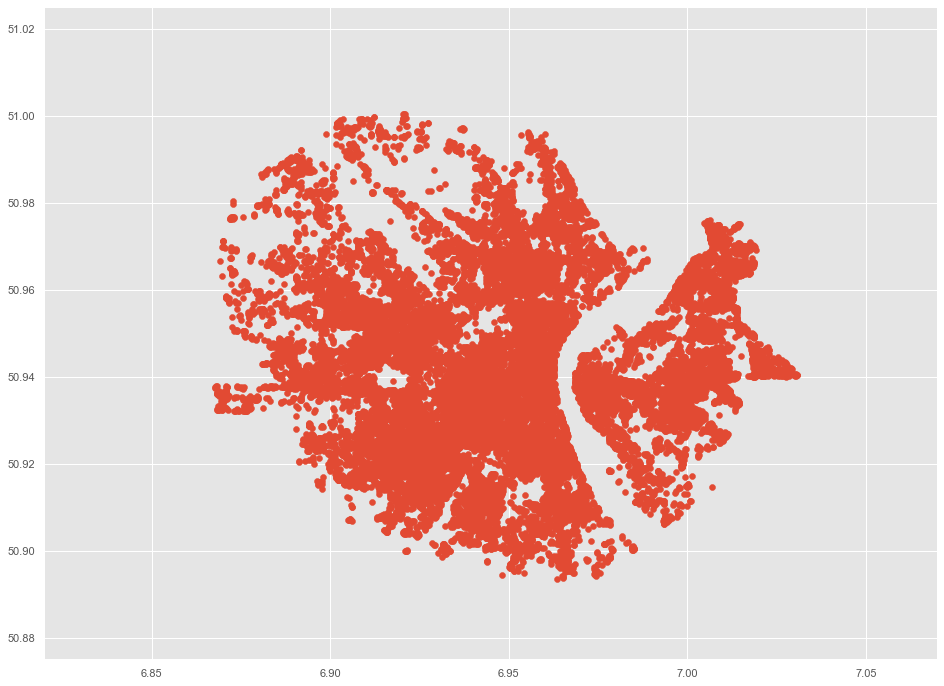

In [33]:
plt.scatter(df_locations['lng'], df_locations['lat'])
plt.xlim(6.82,7.07)
plt.ylim(50.875,51.025)
plt.show()

In [34]:
df_locations.drop(['lat', 'lng'], axis=1, inplace=True)

In [35]:
df_locations.head()

,loc_id,latlng
0,0,"(50.9292, 6.9432)"
1,1,"(50.9443, 6.9431)"
2,2,"(50.9481, 6.927)"
3,3,"(50.9455, 6.9152)"
4,4,"(50.9508, 7.0039)"


### Merging locations with original df - creating two new features for origin and destination id

In [36]:
df['latlng'] = origins #using column latlng to merge origin ids

In [37]:
df = pd.merge(df, df_locations, on='latlng', how='left')

In [38]:
df.rename(columns={'latlng': 'latlng_origin', 'loc_id': 'origin_id'}, inplace=True)

In [39]:
df['latlng'] = destinations #using column latlng to merge destination ids

In [40]:
df = pd.merge(df, df_locations, on='latlng', how='left')

In [41]:
df.rename(columns={'latlng': 'latlng_destination', 'loc_id': 'destination_id'}, inplace=True)

In [42]:
df['origin_id'].value_counts(dropna=False) #checking for NaN values - if we don't have them merge was successful and multiple instances of the same value show how often a location with that id was an origin location

1339     41
19238    29
37901    28
10134    22
8278     21
         ..
12978     1
15027     1
2741      1
25272     1
0         1
Name: origin_id, Length: 39898, dtype: int64

In [43]:
df['destination_id'].value_counts(dropna=False) #checking for NaN values - if we don't have them merge was successful and multiple instances of the same value show how often a location with that id was a destination 

1339     36
37901    29
19238    27
8278     20
4725     20
         ..
6807      1
29338     1
31387     1
17052     1
0         1
Name: destination_id, Length: 40019, dtype: int64

In [45]:
df_clustering = df[['ride_id', 'bike_id', 'origin_id', 'destination_id', 'lat_begin', 'lng_begin', 'lat_end', 'lng_end', 'ride_time', 'distance']]

In [82]:
df_clustering.head()

,ride_id,bike_id,origin_id,destination_id,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance
0,0,0,15405,16502,50.932058,6.988541,50.936326,6.986125,6.0,504.0
1,1,0,16502,32762,50.936326,6.986125,50.932037,6.988254,5.0,500.0
2,2,0,32762,25969,50.932037,6.988254,50.933224,6.982801,7.0,404.0
3,3,0,25309,38004,50.933312,6.982806,50.933619,6.977495,5.0,374.0
4,4,0,38004,8996,50.933619,6.977495,50.936199,6.987294,9.0,744.0


In [83]:
#df_clustering.to_csv('./clustering_data_2020-01.csv', sep=';', index=False)